# Fuzzification

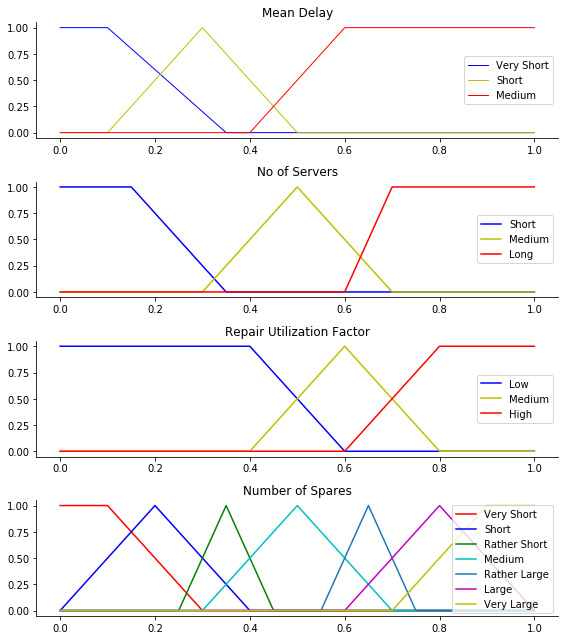

In [7]:
# import numpy as np 
import skfuzzy as fuzz
import matplotlib.pyplot as plt
%matplotlib inline

#Generate universe variables
#     all inputs and output at the range of [0, 1]
x_mean_delay = np.arange(0.0, 1.01, 0.05)
x_no_servers = np.arange(0.0, 1.01, 0.05)
x_repair_uti = np.arange(0.0, 1.01, 0.05)
x_no_spares = np.arange(0.0, 1.01, 0.05)

# Generate fuzzy membership functions
# triangular/Trapezoidal membership function
mean_delay_veryshort = fuzz.trapmf(x_mean_delay, [0.0, 0.0, 0.1, 0.35])
mean_delay_short = fuzz.trimf(x_mean_delay, [0.1, 0.3, 0.5])
mean_delay_medium = fuzz.trapmf(x_mean_delay, [0.4, 0.6, 1.0, 1.0])
no_server_short = fuzz.trapmf(x_no_servers, [0.0, 0.0, 0.15, 0.35])
no_server_medium = fuzz.trimf(x_no_servers, [0.3, 0.5, 0.7])
no_server_long = fuzz.trapmf(x_no_servers, [0.6, 0.7, 1.0, 1.0])
repair_uti_low = fuzz.trapmf(x_repair_uti, [0.0, 0.0, 0.4, 0.6])
repair_uti_medium = fuzz.trimf(x_repair_uti, [0.4, 0.6, 0.8])
repair_uti_high = fuzz.trapmf(x_repair_uti, [0.6, 0.8, 1.0, 1.0])
no_spares_veryshort = fuzz.trapmf(x_no_spares, [0.0, 0.0, 0.1, 0.3])
no_spares_short = fuzz.trimf(x_no_spares, [0, 0.2, 0.4])
no_spares_rathershort = fuzz.trimf(x_no_spares, [0.25, 0.35, 0.45])
no_spares_medium = fuzz.trimf(x_no_spares, [0.3, 0.5, 0.7])
no_spares_ratherlarge = fuzz.trimf(x_no_spares, [0.55, 0.65, 0.75])
no_spares_large = fuzz.trimf(x_no_spares, [0.6, 0.8, 1.0])
no_spares_verylarge = fuzz.trapmf(x_no_spares, [0.7, 0.9, 1.0, 1.0])


#Visualize these universes and membership functions
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(8,9))

#Plot for mean delay 
ax0.plot(x_mean_delay, mean_delay_veryshort, 'b', linewidth=1.0, label='Very Short')
ax0.plot(x_mean_delay, mean_delay_short, 'y', linewidth=1.0, label='Short')
ax0.plot(x_mean_delay, mean_delay_medium, 'r', linewidth=1.0, label='Medium')
ax0.set_title('Mean Delay')
ax0.legend()

#Plot for number of servers
ax1.plot(x_no_servers, no_server_short, 'b', linewidth=1.5, label='Short')
ax1.plot(x_no_servers, no_server_medium, 'y', linewidth=1.5, label='Medium')
ax1.plot(x_no_servers, no_server_long, 'r', linewidth=1.5, label='Long')
ax1.set_title('No of Servers')
ax1.legend()

#Plot for repairing Utilization Factor
ax2.plot(x_repair_uti, repair_uti_low, 'b', linewidth=1.5, label='Low')
ax2.plot(x_repair_uti, repair_uti_medium, 'y', linewidth=1.5, label='Medium')
ax2.plot(x_repair_uti, repair_uti_high, 'r', linewidth=1.5, label='High')
ax2.set_title('Repair Utilization Factor')
ax2.legend()

#Plot for number of spares
ax3.plot(x_no_spares, no_spares_veryshort, 'r', linewidth=1.5, label='Very Short')
ax3.plot(x_no_spares, no_spares_short, 'b', linewidth=1.5, label='Short')
ax3.plot(x_no_spares, no_spares_rathershort, 'g', linewidth=1.5, label='Rather Short')
ax3.plot(x_no_spares, no_spares_medium, 'c', linewidth=1.5, label='Medium')
ax3.plot(x_no_spares, no_spares_ratherlarge, '', linewidth=1.5, label='Rather Large')
ax3.plot(x_no_spares, no_spares_large, 'm', linewidth=1.5, label='Large')
ax3.plot(x_no_spares, no_spares_verylarge, 'y', linewidth=1.5, label='Very Large')
ax3.set_title('Number of Spares')
ax3.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2, ax3):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
plt.tight_layout()

# Rules Evaluation

Degree of Membership of Mean Delay
0.8
0.25
0.0

Degree of Membership of No of Server
0.25
2.7755575615628884e-16
0.0

Degree of Membership of Repair Utilization Factor
0.75
0.25
0.0

RULES


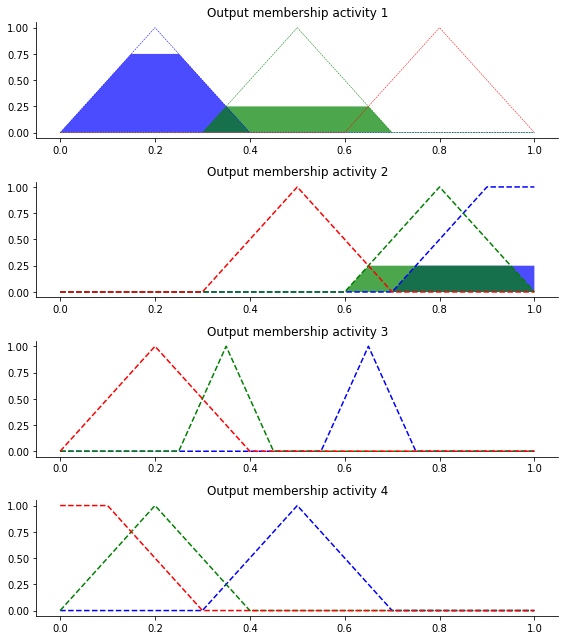

In [8]:
# We need the activation of our fuzzy membership function at these values
# The exact values 6.5 and 9.8 do not exist on our universes...
# This is what fuzz.interp_membership exists for:
meandelay_vs= fuzz.interp_membership(x_mean_delay, mean_delay_veryshort, 0.15)
meandelay_s = fuzz.interp_membership(x_mean_delay, mean_delay_short, 0.15)
meandelay_m = fuzz.interp_membership(x_mean_delay, mean_delay_medium, 0.15)

noserver_s = fuzz.interp_membership(x_no_servers, no_server_short, 0.30)
noserver_m = fuzz.interp_membership(x_no_servers, no_server_medium, 0.30)
noserver_l = fuzz.interp_membership(x_no_servers, no_server_long, 0.30)

repairuti_l = fuzz.interp_membership(x_repair_uti, repair_uti_low, 0.45)
repairuti_m = fuzz.interp_membership(x_repair_uti, repair_uti_medium, 0.45)
repairuti_h = fuzz.interp_membership(x_repair_uti, repair_uti_high, 0.45)


print("Degree of Membership of Mean Delay")
print(meandelay_vs)
print(meandelay_s)
print(meandelay_m)
print('')
print("Degree of Membership of No of Server")
print(noserver_s)
print(noserver_m)
print(noserver_l)
print('')
print("Degree of Membership of Repair Utilization Factor")
print(repairuti_l)
print(repairuti_m)
print(repairuti_h)
print('')
print("RULES")

# rule 1 until rule 3, repair utilization connects to no of spares 
active_rule1 = np.fmin(repairuti_l, no_spares_short)
active_rule2 = np.fmin(repairuti_m, no_spares_medium)
active_rule3 = np.fmin(repairuti_h, no_spares_large)

active_rule4 = np.fmin(meandelay_vs, noserver_s)
active_rule5 = np.fmin(meandelay_s, noserver_s)
active_rule6 = np.fmin(meandelay_m, noserver_s)

active_rule7 = np.fmin(meandelay_vs, noserver_m)
active_rule8 = np.fmin(meandelay_s, noserver_m)
active_rule9 = np.fmin(meandelay_m, noserver_m)

active_rule10 = np.fmin(meandelay_vs, noserver_l)
active_rule11 = np.fmin(meandelay_s, noserver_l)
active_rule12 = np.fmin(meandelay_m, noserver_l)

activation_nospares_s = active_rule1
activation_nospares_m = active_rule2
activation_nospares_l = active_rule3

activation2_nospares_vl = np.fmin(active_rule4, no_spares_verylarge)
activation2_nospares_l = np.fmin(active_rule5, no_spares_large)
activation2_nospares_m = np.fmin(active_rule6, no_spares_medium)

activation3_nospares_rl = np.fmin(active_rule7, no_spares_ratherlarge)
activation3_nospares_rs = np.fmin(active_rule8, no_spares_rathershort)
activation3_nospares_s = np.fmin(active_rule9, no_spares_short)

activation4_nospares_m = np.fmin(active_rule10, no_spares_medium)
activation4_nospares_s = np.fmin(active_rule11, no_spares_short)
activation4_nospares_vs = np.fmin(active_rule12, no_spares_veryshort)
spares0 = np.zeros_like(x_no_spares)

#Visualize this
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(8,9))

#Output membership for activation
ax0.fill_between(x_no_spares, spares0, activation_nospares_s, facecolor='b', alpha=0.7)
ax0.plot(x_no_spares, no_spares_short, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_no_spares, spares0, activation_nospares_m, facecolor='g', alpha=0.7)
ax0.plot(x_no_spares, no_spares_medium, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_no_spares, spares0, activation_nospares_l, facecolor='r', alpha=0.7)
ax0.plot(x_no_spares, no_spares_large, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity 1')

#Output membership for activation2
ax1.fill_between(x_no_spares, spares0, activation2_nospares_vl, facecolor='b', alpha=0.7)
ax1.plot(x_no_spares, no_spares_verylarge, 'b', linewidth=1.5, linestyle='--', )
ax1.fill_between(x_no_spares, spares0, activation2_nospares_l, facecolor='g', alpha=0.7)
ax1.plot(x_no_spares, no_spares_large, 'g', linewidth=1.5, linestyle='--')
ax1.fill_between(x_no_spares, spares0, activation2_nospares_m, facecolor='r', alpha=0.7)
ax1.plot(x_no_spares, no_spares_medium, 'r', linewidth=1.5, linestyle='--')
ax1.set_title('Output membership activity 2')

#Output membership for activation3
ax2.fill_between(x_no_spares, spares0, activation3_nospares_rl, facecolor='b', alpha=0.7)
ax2.plot(x_no_spares, no_spares_ratherlarge, 'b', linewidth=1.5, linestyle='--', )
ax2.fill_between(x_no_spares, spares0, activation3_nospares_rs, facecolor='g', alpha=0.7)
ax2.plot(x_no_spares, no_spares_rathershort, 'g', linewidth=1.5, linestyle='--')
ax2.fill_between(x_no_spares, spares0, activation3_nospares_s, facecolor='r', alpha=0.7)
ax2.plot(x_no_spares, no_spares_short, 'r', linewidth=1.5, linestyle='--')
ax2.set_title('Output membership activity 3')

#Output membership for activation4
ax3.fill_between(x_no_spares, spares0, activation4_nospares_m, facecolor='b', alpha=0.7)
ax3.plot(x_no_spares, no_spares_medium, 'b', linewidth=1.5, linestyle='--', )
ax3.fill_between(x_no_spares, spares0, activation4_nospares_s, facecolor='y', alpha=0.7)
ax3.plot(x_no_spares, no_spares_short, 'g', linewidth=1.5, linestyle='--')
ax3.fill_between(x_no_spares, spares0, activation4_nospares_vs, facecolor='r', alpha=0.7)
ax3.plot(x_no_spares, no_spares_veryshort, 'r', linewidth=1.5, linestyle='--')
ax3.set_title('Output membership activity 4')

# Turn off top/right axes
for ax in (ax0, ax1, ax2, ax3):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
plt.tight_layout()

# Aggregation and Defuzzification

21
21
21
21


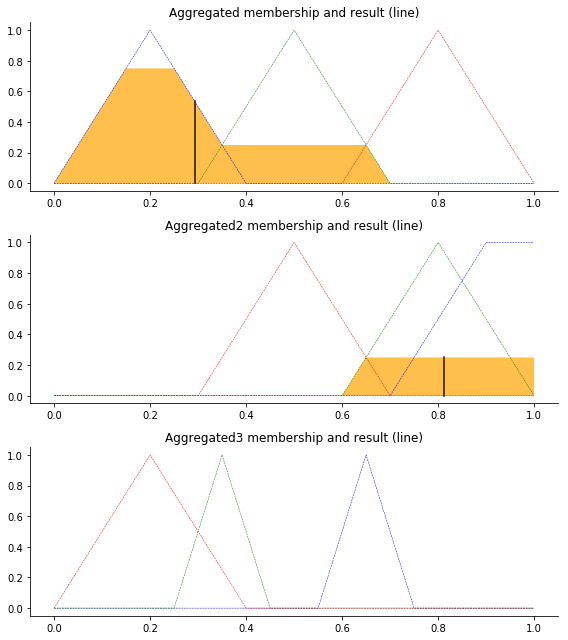

In [3]:
# Aggregate all twelve output membership functions together
aggregated = np.fmax(activation_nospares_s, np.fmax(activation_nospares_m, activation_nospares_l))
aggregated2 = np.fmax(activation2_nospares_vl, np.fmax(activation2_nospares_l, activation2_nospares_m))
aggregated3 = np.fmax(activation3_nospares_rl, np.fmax(activation3_nospares_rs, activation3_nospares_s))
aggregated4 = np.fmax(activation4_nospares_m, np.fmax(activation4_nospares_s, activation4_nospares_vs))

print(len(aggregated))
print(len(aggregated2))
print(len(aggregated3))
print(len(aggregated4))

#Calculate defuzzified result
spares = fuzz.defuzz(x_no_spares, aggregated, 'centroid')
spares_activation_1= fuzz.interp_membership(x_no_spares, aggregated, spares) #for plot

spares2 = fuzz.defuzz(x_no_spares, aggregated2, 'centroid')
spares_activation_2= fuzz.interp_membership(x_no_spares, aggregated2, spares2) #for plot

spares3 = fuzz.defuzz(x_no_spares, aggregated3, 'centroid')
spares_activation_3= fuzz.interp_membership(x_no_spares, aggregated3, spares3) #for plot

#spares4 = fuzz.defuzz(x_no_spares, aggregated4, 'centroid')
#spares_activation_4= fuzz.interp_membership(x_no_spares, aggregated4, spares4) #for plot

# Visualize this
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8,9))

ax0.plot(x_no_spares, no_spares_short, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_no_spares, no_spares_medium, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_no_spares, no_spares_large, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_no_spares, spares0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([spares, spares], [0, spares_activation_1], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')


ax1.plot(x_no_spares, no_spares_verylarge, 'b', linewidth=0.5, linestyle='--', )
ax1.plot(x_no_spares, no_spares_large, 'g', linewidth=0.5, linestyle='--')
ax1.plot(x_no_spares, no_spares_medium, 'r', linewidth=0.5, linestyle='--')
ax1.fill_between(x_no_spares, spares0, aggregated2, facecolor='Orange', alpha=0.7)
ax1.plot([spares2, spares2], [0, spares_activation_2], 'k', linewidth=1.5, alpha=0.9)
ax1.set_title('Aggregated2 membership and result (line)')

ax2.plot(x_no_spares, no_spares_ratherlarge, 'b', linewidth=0.5, linestyle='--', )
ax2.plot(x_no_spares, no_spares_rathershort, 'g', linewidth=0.5, linestyle='--')
ax2.plot(x_no_spares, no_spares_short, 'r', linewidth=0.5, linestyle='--')
ax2.fill_between(x_no_spares, spares0, aggregated3, facecolor='Orange', alpha=0.7)
ax2.plot([spares3, spares3], [0, spares_activation_3], 'k', linewidth=1.5, alpha=0.9)
ax2.set_title('Aggregated3 membership and result (line)')

#ax3.plot(x_no_spares, no_spares_medium, 'b', linewidth=0.5, linestyle='--', )
#ax3.plot(x_no_spares, no_spares_short, 'g', linewidth=0.5, linestyle='--')
#ax3.plot(x_no_spares, no_spares_veryshort, 'r', linewidth=0.5, linestyle='--')
#ax3.fill_between(x_no_spares, spares0, aggregated4, facecolor='Orange', alpha=0.7)
#ax3.plot([spares4, spares4], [0, spares_activation_4], 'k', linewidth=1.5, alpha=0.9)
#ax3.set_title('Aggregated4 membership and result (line)')

# Turn off top/right axes
for ax in (ax0,ax1,ax2 ):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
plt.tight_layout()

In [4]:
spares

0.2928571428571429

In [5]:
spares2

0.8122222222222224

In [6]:
spares3

0.18749999999999978